In [1]:
import numpy as np
import emcee
import corner
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Data
zbin_edge = np.array((0.13159712, 0.20840302, 0.33003624, 0.52265998, 0.82770744, 1.31079410, 2.07583147, 
                      3.28737848, 5.20603787, 8.24451170, 13.05637315, 20.67664966))
zbin_cen = (zbin_edge[1:]+zbin_edge[:-1])/2.
zxi_20 = [366.1, 264.3, 184.0, 128.6, 84.7,  59.4, 42.9, 30.9,  21.9, 14.6,  8.24]
zxi_20_err = np.array([9.3,7.6,6.6,5.5,4.3,3.6,3.3,3.1,2.7,2.1,1.32])

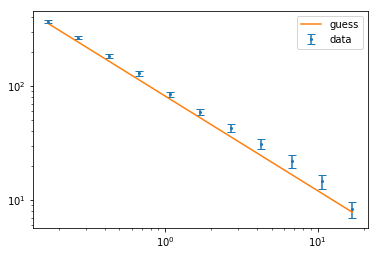

In [3]:
plt.errorbar(zbin_cen,zxi_20,yerr=zxi_20_err,fmt='o',markersize=2,capsize=4,label='data')
plt.plot(zbin_cen,(zbin_cen/200)**-0.83,label = 'guess')
plt.legend()
plt.xscale('log')
plt.yscale('log')

In [4]:
#log liklihood
def lnlike(theta, rp, wp, wperr):
    ro, g = theta
    model = (rp/ro)**(-g)
    inv_sigma2 = 1.0/wperr**2.
    return -0.5*(np.sum((wp-model)**2*inv_sigma2 - np.log(inv_sigma2)))

In [5]:
#log prior
def lnprior(theta):
    ro, g = theta
    if 150. < ro < 450. and -1.0 < g < 2.0:
        return 0.0
    return -np.inf

In [6]:
#log prop
def lnprob(theta, rp, wp, wperr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, rp, wp, wperr)

In [19]:
ndim, nwalkers = 2, 100
guess = [200.,0.8]
pos = [guess + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [20]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(zbin_cen, zxi_20, zxi_20_err))

In [ ]:
sampler.run_mcmc(pos, 100)

In [ ]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))
print(np.shape(sampler.chain))
print(np.shape(samples))
print(sampler.chain[np.where(sampler.lnprobability==sampler.lnprobability.max())])
print(sampler.get_autocorr_time(c=10))

Text(0,0.5,'ro')

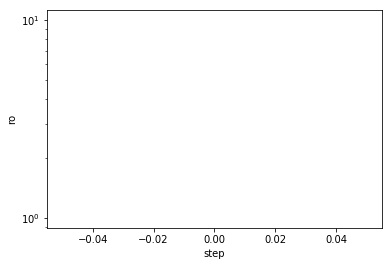

In [23]:
c = ['#fee8c8','#fdbb84','#e34a33']
for i in range(3):
    plt.plot(sampler.chain[i+50,1000:5000,0],c= c[-i])
    #plt.ylim(150,250)
plt.yscale('log')
plt.xlabel('step')
plt.ylabel('ro')

Text(0,0.5,'g')

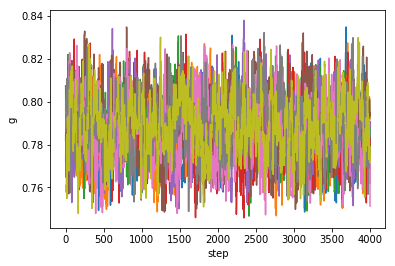

In [543]:
for i in range(1,10):
    plt.plot(sampler.chain[i,1000:5000,1])
plt.xlabel('step')
plt.ylabel('g')

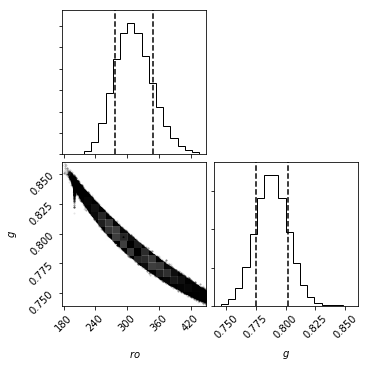

In [545]:
fig = corner.corner(samples, labels=["$ro$", "$g$", "$\ln\,f$"],quantiles=(0.16, 0.84), levels=(1-np.exp(-0.5),))#,
                      #truths=[m_true, b_true, np.log(f_true)])
#fig.savefig("triangle.png")

In [546]:
x = np.median(samples[:,0])
y = np.median(samples[:,1])
f'ro median = {x}; g median = {y}'

'ro median = 310.86599950181625; g median = 0.7882810668377999'

In [547]:
x1 = np.mean(samples[:,0])
y1 = np.mean(samples[:,1])
f'ro median = {x1}; g median = {y1}'

'ro median = 312.97765998522397; g median = 0.7884494535244223'

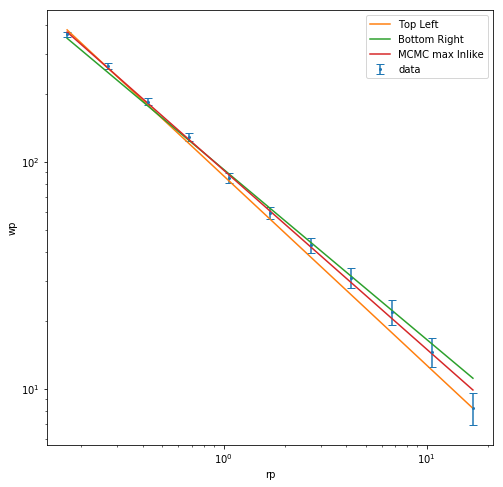

In [595]:
plt.figure(figsize=(8,8))
plt.errorbar(zbin_cen,zxi_20,yerr=zxi_20_err,fmt='o',markersize=2,capsize=4,label='data')
#plt.plot(zbin_cen,(zbin_cen/200)**-0.83,label="guess")
plt.plot(zbin_cen,(zbin_cen/210)**-0.835,label="Top Left")
plt.plot(zbin_cen,(zbin_cen/420)**-0.750,label="Bottom Right")
#plt.plot(zbin_cen,(zbin_cen/200)**-0.83,label="guess")
plt.plot(zbin_cen,(zbin_cen/307.13608335)**-0.78973806,label = "MCMC max lnlike")
#plt.plot(zbin_cen,(zbin_cen/x)**-y,label="MCMC median",linestyle = "--")
#plt.plot(zbin_cen,(zbin_cen/x1)**-y1,label="MCMC mean",linestyle = ':')
plt.legend()
plt.xlabel('rp')
plt.ylabel('wp')
plt.xscale('log')
plt.yscale('log')